In [155]:
# Ignore Warnings.
import warnings
warnings.filterwarnings("ignore")

In [315]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import scipy.stats as st
import seaborn as sns
from matplotlib import cm
import re
# Import the data
Hurricane_df = pd.read_csv('Hurricanes/atlantic.csv')
# Hurricane_df.head(10)

# Hurricane_df['Date'] = pd.to_datetime(Hurricane_df['Date'],unit='s')

# Convert date column as datetime.
Hurricane_df['Date'] = pd.to_datetime(Hurricane_df['Date'] , format= '%Y%m%d')
# Hurricane_df.head(5)
# # type(Hurricane_df['Maximum Wind'][0])
# # print(Hurricane_df)
# # Hurricane_df[Hurricane_df<-998] = 0
Hurricane_df = Hurricane_df[['ID', 'Name', 'Date', 'Time', 'Status', 'Latitude', 'Longitude', 'Maximum Wind']]

In [316]:
Hurricane_df.tail(5)

,ID,Name,Date,Time,Status,Latitude,Longitude,Maximum Wind
49100,AL122015,KATE,2015-11-12,1200,EX,41.3N,50.4W,55
49101,AL122015,KATE,2015-11-12,1800,EX,41.9N,49.9W,55
49102,AL122015,KATE,2015-11-13,0,EX,41.5N,49.2W,50
49103,AL122015,KATE,2015-11-13,600,EX,40.8N,47.5W,45
49104,AL122015,KATE,2015-11-13,1200,EX,40.7N,45.4W,45


In [317]:
# Create csv file & export data 
Hurricane_df.to_csv("new_data_atlantic.csv")


In [318]:
new_data_atlantic = pd.read_csv('Hurricanes/new_data_atlantic.csv')
new_data_atlantic

,Unnamed: 0,ID,Name,Date,Time,Status,Latitude,Longitude,Maximum Wind
0,0,AL011851,UNNAMED,1851-06-25,0,HU,28.0N,94.8W,80
1,1,AL011851,UNNAMED,1851-06-25,600,HU,28.0N,95.4W,80
2,2,AL011851,UNNAMED,1851-06-25,1200,HU,28.0N,96.0W,80
3,3,AL011851,UNNAMED,1851-06-25,1800,HU,28.1N,96.5W,80
4,4,AL011851,UNNAMED,1851-06-25,2100,HU,28.2N,96.8W,80
...,...,...,...,...,...,...,...,...,...
49100,49100,AL122015,KATE,2015-11-12,1200,EX,41.3N,50.4W,55
49101,49101,AL122015,KATE,2015-11-12,1800,EX,41.9N,49.9W,55
49102,49102,AL122015,KATE,2015-11-13,0,EX,41.5N,49.2W,50
49103,49103,AL122015,KATE,2015-11-13,600,EX,40.8N,47.5W,45


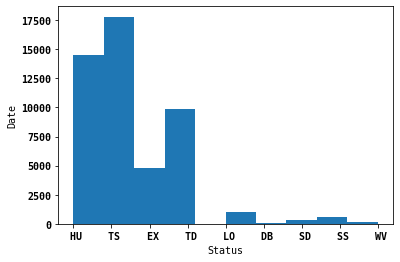

In [319]:
# Plot histogram
plt.hist(new_data_atlantic['Status'])
plt.xlabel('Status')
plt.ylabel('Date')
plt.show()

In [328]:
# # I want to create columns Latitude Hemisphere and Longitude Hemisphere with code 0 = N , 1 = S & 0 = E , 1 = W.
# # def hemisphere(coord):
# #         hem = re.findall(r'[NSWE]' , coord)[0]
# #         if hem == 'N' or hem == 'E':
# #             return 0
# #         else:
# #             return 1

# # # Creating the column Latitude_Hemisphere.    
# # new_data_atlantic['Latitude_Hemisphere'] = new_data_atlantic['Latitude'].apply(hemisphere)
# # new_data_atlantic['Longitude_Hemisphere'] = new_data_atlantic['Longitude'].apply(hemisphere)
# # new_data_atlantic['Latitude_Hemisphere'] = new_data_atlantic['Latitude_Hemisphere'].astype('category')
# # new_data_atlantic['Longitude_Hemisphere'] = new_data_atlantic['Longitude_Hemisphere'].astype('category')

# Convert the latitude and longitude Column to numeric type.
new_data_atlantic['Latitude'] =  new_data_atlantic['Latitude'].apply(lambda x: re.match('[0-9]{1,3}.[0-9]{0,1}' , x)[0])
new_data_atlantic['Longitude'] =   new_data_atlantic['Longitude'].apply(lambda x: re.match('[0-9]{1,3}.[0-9]{0,1}' , x)[0])

# The missing values are given by -999. So , we need to fill them appropriately.

# Show the count of missing values and fill them with mean.
for column in new_data_atlantic.columns:
    missing_cnt = new_data_atlantic[column][new_data_atlantic[column] == -999].count()
    print('Missing Values in column {col} = '.format(col = column) , missing_cnt )
    if missing_cnt!= 0:
#         print('in ' , column)
        mean = round(new_data_atlantic[column][new_data_atlantic[column] != -999 ].mean())
#         print("mean",mean)
        index = new_data_atlantic.loc[new_data_atlantic[column] == -999 , column].index
#         print("index" , index )
        new_data_atlantic.loc[new_data_atlantic[column] == -999 , column] = mean
#         print(df.loc[index , column])
        
# Restructure the dataframe for visibility and remove columns ID and Event.        
new_data_atlantic =  new_data_atlantic[['ID', 'Name', 'Date', 'Time', 'Status', 'Latitude', 
       'Longitude', 'Maximum Wind']]

# Change all time to format HHMM.
new_data_atlantic['Time'] = new_data_atlantic['Time'].astype('object')
def hhmm(time):
    time = str(time)
    digits = re.findall(r'\d', time)
    t = ''
    if len(digits) == 1:
        t ='0{i}00'.format(i =time)
    elif len(digits) == 2:
        t = '{i}00'.format(i =time)
    elif len(digits) == 3:
        t = '0{i}'.format(i =time)
    else:
        t = time
    return t
# Apply the function.
new_data_atlantic['Time'] = new_data_atlantic['Time'].apply(hhmm)

# # Convert the column into Datetime.
# new_data_atlantic['Time'] = pd.to_datetime(new_data_atlantic['Time'] , format='%H%M').dt.time


# Convert the status column to categorical.
new_data_atlantic['Status'] = new_data_atlantic['Status'].astype('category')

new_data = new_data_atlantic.drop(columns = ['ID' , 'Status'])

Missing Values in column ID =  0
Missing Values in column Name =  0
Missing Values in column Date =  0
Missing Values in column Time =  0
Missing Values in column Status =  0
Missing Values in column Latitude =  0
Missing Values in column Longitude =  0
Missing Values in column Maximum Wind =  0


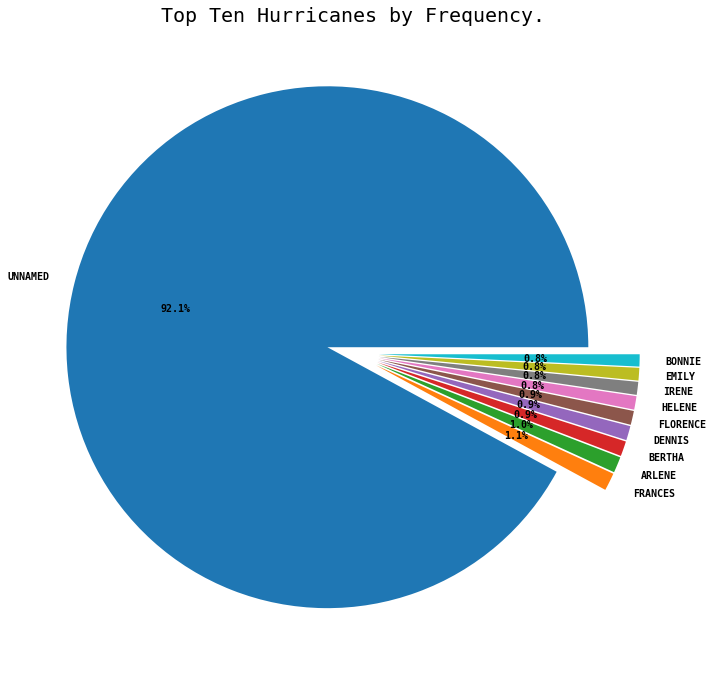

In [321]:
# Find the top ten cyclones which have occured the maximum number of times.
lst = [x.strip() for x in new_data_atlantic.groupby('Name').count().sort_values(by = 'Date' , ascending = False).index[:10]]
val = new_data_atlantic.groupby('Name').count().sort_values(by = 'Date' , ascending = False)[:10]['Date'].values
font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 10}
plt.rc('font', **font)
fig , ax = plt.subplots()
fig.set_size_inches(12,12)
ax.pie(  labels = lst , x = val , autopct='%.1f%%' , explode = [0.1 for x in range(10)])
plt.title('Top Ten Hurricanes by Frequency.' , fontsize = 20)
plt.show()


## Year-Wise Frequency of Hurricanes. 

In [329]:
# Year-Wise Frequency of Hurricanes.
temp = new_data_atlantic.groupby('Year').count().sort_values(by = 'Month' , ascending = False)
plt.figure(figsize= (12,12))
sns.lineplot(x = temp.index , y = 'Month' , new_data_atlantic = temp , label = 'Frequency')
plt.ylabel('Frequency')
plt.title('Year Wise Frequency of Hurricanes.')
plt.show()

KeyError: 'Year'

## Storm Frequencies by Month

In [335]:
new_data_atlantic['Month'] = new_data_atlantic['Date'].apply(lambda x: x.month)
new_data_atlantic['Year'] = new_data_atlantic['Date'].apply(lambda x: x.year)
mnt = ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'June' , 'July' , 'Aug' , 'Sep','Oct' , 'Nov' , 'Dec']
temp = new_data_atlantic.groupby('Month').count()
temp.loc[4] = 0
temp = temp.sort_values(by = 'Month' , ascending = False)
font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)
plt.figure(figsize = (10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x = temp.index , y = 'Date' , data=temp , palette = 'RdBu' )
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11] , mnt , rotation = 90)
plt.ylabel('Frequency')
plt.title('Frequency of Storms by Month.')

AttributeError: 'str' object has no attribute 'month'

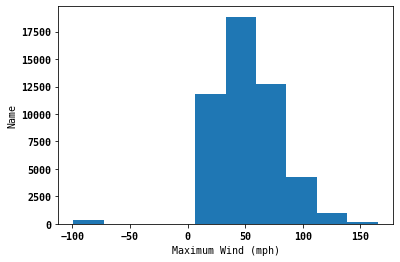

In [332]:
# Histogram showing Maximum Wind
plt.hist(new_data_atlantic['Maximum Wind'])
plt.xlabel('Maximum Wind (mph)')
plt.ylabel('Name')
plt.show()